In [43]:
import pandas as pd
import numpy as np
from scipy.constants import pi
import at
import matplotlib.pyplot as plt
from aps_figures.aps_one_column import *
from machine_data.soleil import v2366, v2366_v2
from machine_data.TDR2 import TDR2
ring = v2366_v2(IDs='open')
Q_S = ring.synchrotron_tune(1.8e6)
print(ring.tune)

[54.2 18.3]


(0.0, 100.0)

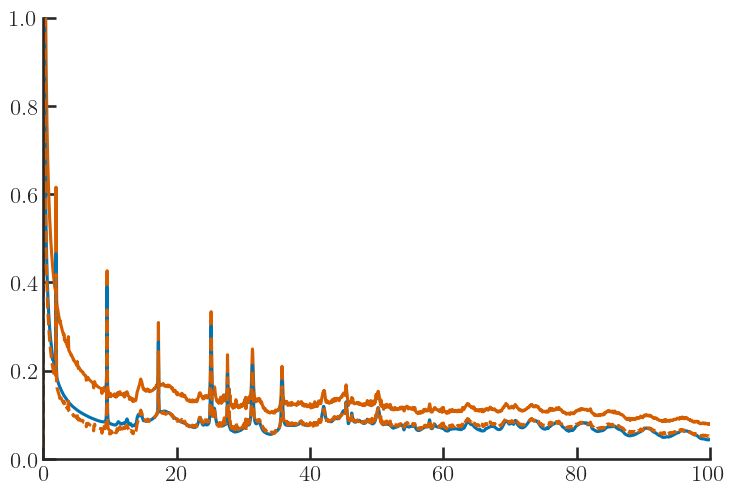

In [44]:
%matplotlib inline
Zxdip_IDopen = pd.read_csv('Zxdip_IDopen.dat', sep='\t', header=None)
Zydip_IDopen = pd.read_csv('Zydip_IDopen.dat', sep='\t', header=None)
# Zxdip_IDclose = pd.read_csv('Zxdip_IDclose.dat', sep='\t', header=None)
Zydip_IDclose = pd.read_csv('Zydip_IDclose.dat', sep='\t', header=None)


# plt.plot(Zxdip_IDclose[0]/1e9, Zxdip_IDclose[1]/1e6, color='b')
plt.plot(Zydip_IDclose[0]/1e9, Zydip_IDclose[1]/1e6, color='r')

plt.plot(Zxdip_IDopen[0]/1e9, Zxdip_IDopen[1]/1e6, color='b')
plt.plot(Zydip_IDopen[0]/1e9, Zydip_IDopen[1]/1e6, color='r', linestyle='dashed')


plt.ylim(0, 1)
plt.xlim(0, 100)

In [45]:
filename = 'delphi(taub=3.4e-11,ID=close,plane=horizontal,Qp=0.0,M=416,Q_s=2.1e-03,n_max=415).csv'
datafr = pd.read_csv(filename, sep='\t')
print(datafr[datafr['eigvals_im']<0])

       Unnamed: 0  BunchCurrent    eigvals_re    eigvals_im   Qp  \
0               0      0.000001 -1.558150e-06 -2.550407e-07  0.0   
1               1      0.000001 -2.422964e-07 -5.220257e-09  0.0   
2               2      0.000001 -1.086835e-07 -1.482304e-09  0.0   
3               3      0.000001 -4.471405e-08 -7.064837e-10  0.0   
4               4      0.000001 -1.403972e-08 -2.374640e-10  0.0   
...           ...           ...           ...           ...  ...   
34756       34756      0.000100 -6.351000e-03 -2.670460e-19  0.0   
34757       34757      0.000100 -2.117000e-03 -1.255282e-19  0.0   
34758       34758      0.000100  2.117000e-03 -1.061141e-19  0.0   
34759       34759      0.000100 -6.351000e-03 -8.678995e-20  0.0   
34760       34760      0.000100  2.117000e-03 -7.299381e-20  0.0   

        BunchLength   nx ID_state  
0      3.408000e-11  413    close  
1      3.408000e-11  413    close  
2      3.408000e-11  413    close  
3      3.408000e-11  413    close  
4  

In [46]:
def find_threshold(filename, ring, plane='vertical'):
    datafr = pd.read_csv(filename, sep='\t')
    dQrad = (2*np.pi*ring.tau[1]*ring.f0)**(-1) if plane=='vertical' else (2*np.pi*ring.tau[0]*ring.f0)**(-1)
    eigvals = []
    threshold_currents = []
    # I = datafr['BunchCurrent'].drop_duplicates()[:]

    for nx in datafr['nx'].drop_duplicates():
        index0 = (datafr['nx']==nx)
        new_data = datafr[index0].drop_duplicates(subset=['BunchCurrent'])
        eigvals_im = -new_data['eigvals_im']
        undamped_tune = np.abs(eigvals_im-dQrad) 
        index = undamped_tune == np.min(undamped_tune)
        eigvals.append(new_data[index]['eigvals_im'])
        threshold_currents.append(new_data[index]['BunchCurrent'][:])
        # print(datafr[index0 & index])
    # threshold_index = datafr['eigvals_im'] in eigvals
    threshold = np.min(ring.h*1e3*np.array(threshold_currents).flatten())
    return threshold

In [47]:
plane = 'horizontal'
id_state = 'close'
taub = 5.6e-11
Q_s = 2.1e-3
chromaticity = 1.6
ring = v2366_v2(IDs='close')
filename = f'delphi(taub={taub:.1e},ID={id_state},plane={plane:},Qp={chromaticity:.1f},M=416,Q_s={Q_s:.1e},n_max=415).csv'
find_threshold(filename, ring, plane=plane)

184.704

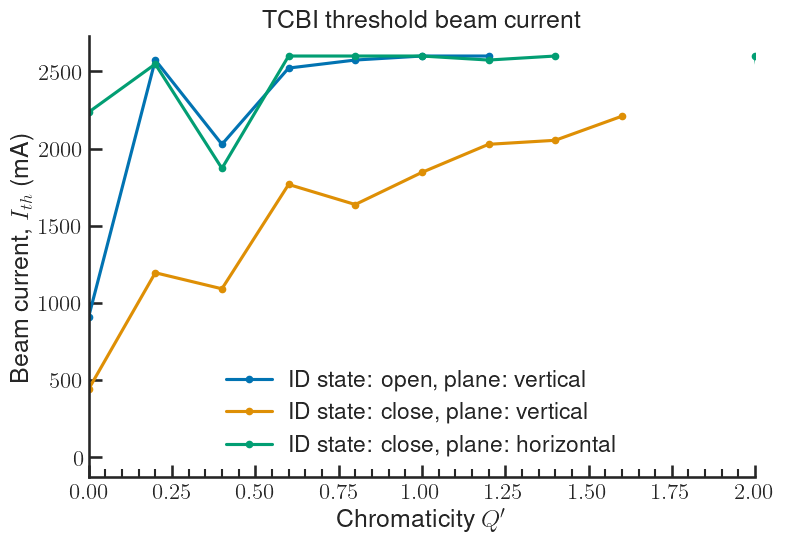

In [91]:
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
chroma = np.linspace(0, 5, 26)
I = np.empty(shape=(len(chroma)))
plane = 'vertical'
id_state = 'close'
taub = 1.6e-10
Q_s = 0.7e-3
fig, ax = plt.subplots(1, 1)
for id_state in ['open', 'close']:
    for plane in ['vertical', 'horizontal']:
        if plane=='horizontal' and id_state == 'open':
            continue
        for i, chromaticity in enumerate(chroma):
            try:
                filename = f'delphi(taub={taub:.1e},ID={id_state},plane={plane:},Qp={chromaticity:.1f},M=416,Q_s={Q_s:.1e},n_max=31).csv'
                ring = v2366_v2(IDs=id_state)
                I[i] = find_threshold(filename, ring, plane=plane)
            except:
                I[i] = np.nan
        ax.plot(chroma, I, marker='.', label=f'ID state: {id_state:}, plane: {plane:}')
ax.set_xlim(0, 2.)
# ax.set_ylim(0, 500)
ax.set_xlabel('Chromaticity $Q\'$')
ax.set_ylabel('Beam current, $I_{th}$ (mA)')
ax.title.set_text('TCBI threshold beam current')
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
ax.legend()
plt.savefig('/home/gubaidulin/Pictures/work/TCBI/thresholds_vs_chroma32_hc.pdf')
plt.savefig('/home/gubaidulin/Pictures/work/TCBI/thresholds_vs_chroma32_hc.png')

# print(np.min((-datafr['eigvals_im'] - dQrad))/Q_S)

In [49]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib.colors import ListedColormap
def plot_vs_chromaticity(datafr, k, Q_S = 2.1e-3):
    fig, axs = plt.subplots(1, 2)
    palette = sbs.color_palette('colorblind')
    axs[0].set_ylabel('Coherent tune shift, $-\mathrm{Im}\Delta Q_\mathrm{coh}/Q_s$')
    axs[1].set_ylabel('Coherent tune shift, $\mathrm{Re}\Delta Q_\mathrm{coh}/Q_s$')

    for Qp in datafr['Qp'].drop_duplicates():
        index = datafr['Qp']==Qp
        color_index = 1 #datafr[index]['eigvals_re'][:k]/Q_S
        axs[0].scatter(datafr[index]['Qp'][:k],
                       -datafr[index]['eigvals_im'][:k]/Q_S,
                       marker='.',
                       color=palette[color_index],
                       cmap=palette)
        axs[1].scatter(datafr[index]['Qp'][:k],
                       datafr[index]['eigvals_re'][:k]/Q_S,
                       marker='.',
                       color=palette[color_index],
                       cmap=palette)    
    minor_locator = AutoMinorLocator(5)
    axs[0].title.set_text('Imaginary part')
    axs[1].title.set_text('Real part')
    axs[0].set_ylim(0, )
    axs[1].set_ylim(-5, 1)
    for ax in axs:
        ax.set_xlabel('Chromaticity, $Q\'$')
        ax.set_xlim(0, )
        ax.xaxis.set_minor_locator(minor_locator)
    return fig, axs

def plot_vs_current(datafr, k, Q_S = 2.1e-3):
    fig, axs = plt.subplots(1, 2)
    palette = sbs.color_palette('colorblind')

    axs[0].set_ylabel('Growth rate, $-\mathrm{Im}\Delta Q_\mathrm{coh}/Q_s$')
    axs[1].set_ylabel('Coherent tune shift, $\mathrm{Re}\Delta Q_\mathrm{coh}/Q_s$')

    for Qp in datafr['BunchCurrent'].drop_duplicates():
        for nx in datafr['nx'].drop_duplicates():
            index = (datafr['BunchCurrent']==Qp) & (datafr['nx']==nx)
            # index = datafr[index]['nx']==415
            color_index = 415-nx #datafr[index]['eigvals_re'][:k]/Q_S
            axs[0].scatter(416*datafr[index]['BunchCurrent'][:k]/1e-3,
                           -datafr[index]['eigvals_im'][:k]/Q_S,
                           marker='.',
                           color=palette[color_index],
                           # cmap=palette[color_index]
                          )
            axs[1].scatter(datafr[index]['BunchCurrent'][:k]/1e-3,
                           datafr[index]['eigvals_re'][:k]/Q_S,
                           marker='.',
                           color=palette[color_index],
                           # cmap=palette[color_index]
                          )    
    minor_locator = MultipleLocator(5)
    axs[0].title.set_text('Imaginary part')
    axs[1].title.set_text('Real part')
    fig.suptitle('DELPHI')
    axs[1].set_ylim(-4, 1)
    axs[0].set_ylim(0,)
    print(Q_S)
    for ax in axs:
        ax.set_xlabel('Bunch current, $I_b$ (mA)')
        ax.set_xlim(0, )
        ax.xaxis.set_minor_locator(minor_locator)
    return fig, axs

Q_s = 2.1e-3

0.0021
8045.959688674181
1.9780728371772517e-05
Damping tune shift 9.4e-03
0.0021169751349075974


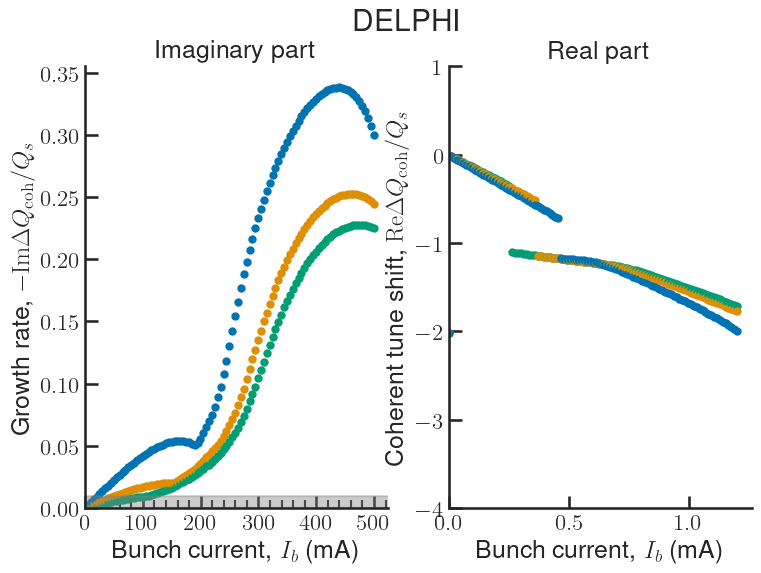

In [84]:
%matplotlib inline
plane = 'vertical'
chromaticity = 1.0
Q_s = 2.1e-3
taub = 3.4e-11
filename = f'delphi(taub={taub:.1e},ID=close,plane={plane:},Qp={chromaticity:.1f},M=416,Q_s={Q_s:.1e},n_max=415).csv'
datafr = pd.read_csv(filename, sep='\t')
# fig, axs = plot_vs_chromaticity(datafr, k=1, Q_S=Q_s)
fig, axs = plot_vs_current(datafr, k=1, Q_S=Q_s)

print(ring.tau[1]*ring.f0)
dQrad = (2*np.pi*ring.tau[1]*ring.f0)**(-1)
print(dQrad)
dQdamp = (2*np.pi*10)**(-1)
print('Damping tune shift {:.1e}'.format(dQrad/Q_s))
I = np.linspace(0, 5, 1000)
axs[0].fill_between(416*I, dQrad/Q_s, 0,  color='grey', alpha=0.4)
axs[0].xaxis.set_major_locator(MultipleLocator(100))
axs[0].xaxis.set_minor_locator(MultipleLocator(20))

# print(axs)
print(Q_S)

# axs[0].axhline(dQdamp/Q_S, color='black')
# axs[0].set_ylim(0, .01)
# axs[0].set_xlim(0, 100)
# plt.savefig('tmci_delphi_HC_imag.png')

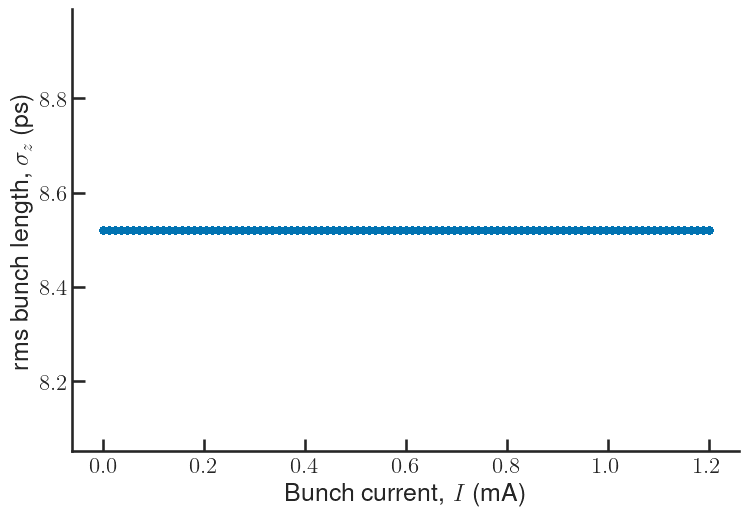

In [51]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
ax.plot(datafr['BunchCurrent'][:]/1e-3, datafr['BunchLength'][:]/1e-12/4, marker='.')
ax.set_xlabel('Bunch current, $I$ (mA)')
ax.set_ylabel('rms bunch length, $\sigma_z$ (ps)')
sigmas_file = np.load('sigmas_HC.npy')
# ax.plot(datafr['BunchCurrent'].drop_duplicates()[:50]*1e3, sigmas_file/1e-12)

In [52]:
def plot_vs_chromaticity2(ax, datafr, k, Q_S = 2.1e-3, color_index=1):
    palette = sbs.color_palette('colorblind')
    ax.set_ylabel('Coherent tune shift, $-\mathrm{Im}\Delta Q_\mathrm{coh}/Q_s$')

    for Qp in datafr['Qp'].drop_duplicates():
        index = datafr['Qp']==Qp
        ax.scatter(datafr[index]['Qp'][:k],
                       -datafr[index]['eigvals_im'][:k]/Q_S,
                       marker='.',
                       color=palette[color_index],
                       cmap=palette,)
    minor_locator = AutoMinorLocator(5)
    ax.title.set_text('Imaginary part')
    ax.set_ylim(0, )
    ax.set_xlabel('Chromaticity, $Q\'$')
    ax.set_xlim(0, )
    ax.xaxis.set_minor_locator(minor_locator)
    return 0

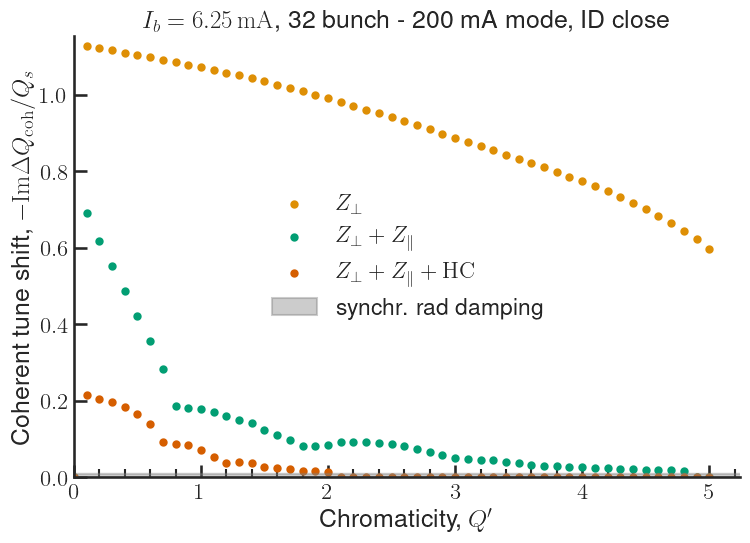

In [65]:
fig, ax = plt.subplots(1, 1)
filename = 'delphi(taub=3.4e-11,ID=close,plane=vertical,Ib=6.25,M=1,Q_s=2.1e-03,n_max=0).csv'
datafr1 = pd.read_csv(filename, sep='\t')
filename = 'delphi(taub=7.6e-11,ID=close,plane=vertical,Ib=6.25,M=1,Q_s=2.1e-03,n_max=0).csv'
datafr2 = pd.read_csv(filename, sep='\t')
filename = 'delphi(taub=2.0e-10,ID=close,plane=vertical,Ib=6.25,M=1,Q_s=7.0e-04,n_max=0).csv'
datafr3 = pd.read_csv(filename, sep='\t')
palette = sbs.color_palette('colorblind')
plot_vs_chromaticity2(ax, datafr1, k=1, Q_S=2.1e-3, color_index=1)
plot_vs_chromaticity2(ax, datafr2, k=1, Q_S=2.1e-3, color_index=2)
plot_vs_chromaticity2(ax, datafr3, k=1, Q_S=2.1e-3, color_index=3)
point1 = ax.scatter(0, 0, marker='.', color=palette[1])
point2 = ax.scatter(0, 0, marker='.', color=palette[2])
point3 = ax.scatter(0, 0, marker='.', color=palette[3])

dQrad = (2*np.pi*ring.tau[1]*ring.f0)**(-1)
point4 = ax.fill_between(416*I, dQrad/Q_s, 0,  color='grey', alpha=0.4, label='Synchr. rad. damping')
ax.title.set_text('$I_b=6.25\,\mathrm{mA}$, 32 bunch - 200 mA mode, ID close')
# ax.title.set_text('$I_b=1.2\,\mathrm{mA}$, uniform mode, ID close')

plt.legend(handles=[point1, point2, point3, point4], 
              labels=['$Z_\perp$',
                      '$Z_\perp+Z_\parallel$',
                      "$Z_\perp+Z_\parallel+\mathrm{HC}$",
                     "synchr. rad damping"],
          )
# plt.savefig('/home/gubaidulin/Pictures/work/TMCI/head_tail_32_chroma.svg')

In [48]:
# imp_model = TDR2.load_TDR2(version='TDR2.1_IDclose')
# imp_model.sum.Zxdip.data.to_csv('Zxdip_IDclose.dat', sep='\t')
# imp_model.sum.Zydip.data.to_csv('Zydip_IDclose.dat', sep='\t')
# plt.plot(imp_model.sum.Zxdip.data['real'])
# plt.plot(imp_model.sum.Zydip.data['real'])
# plt.ylim(0, 1e6)

In [10]:
from mbtrack2.instability import rwmbi_threshold
# rwmbi_threshold?
rho_material=2.135e-8
for beff in [5.50e-3, 6.73e-3]:
    if beff == 5.5e-3:
        id_state = 'close'
    if beff == 6.73e-3:
        id_state = 'open'
    ring = v2366_v2(IDs=id_state)
    Ith = rwmbi_threshold(ring, beff, rho_material, plane='y')
    print(f"TCBI threshold current {1e3*Ith:.1f}")
beff = 6.38e-3
ring = v2366_v2(IDs='close')
Ith = rwmbi_threshold(ring, beff, rho_material, plane='x')
print(f"TCBI threshold current {1e3*Ith:.1f}")


TCBI threshold current 14.0
TCBI threshold current 17.1
TCBI threshold current 44.3


0.000105751